# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [23]:
# Análise dados
import pandas as pd
import numpy as np

# Plotagem
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Importe de daddos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [25]:
# Inserindo Flag
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


# 1 Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [26]:
def calcula_indicadores(
        cat: str,
        flag: str,
        df: pd.DataFrame
    ) -> pd.DataFrame:
    '''
    Função que calcula indices de bivariadas categórias e flag
    :param cat (str): Variável independente;
    :param flag (str): Variável dependente;
    :param df (pd.DataFrame): DataFrame contendo o conjunto de dados
    :return tab (pd.DataFrame): DataFrame com os indices;
    '''
    tab = pd.crosstab(df[cat], df[flag], margins=True)
    odds_all = tab.iloc[2, 1] / tab.iloc[2, 0]
    tab = (
        tab.assign(prob = tab["All"] / tab.loc['All', 'All'])               # Probabilidade de ser mulher ou homem no conjunto de dados
        .assign(risck_event = tab[1]/tab['All'])                            # Risco do evento (probabilidede) de uma mulher ou de um homem estar doente
        .assign(odds = tab.loc[:, 1] / tab.loc[:, 0])                       # Chance (odds) de uma mulher ou de um homem estar doente
        .assign(odds_ratio = (tab.iloc[:, 1] / tab.iloc[:, 0])/(odds_all))  # A razão entre as chances de estar doente para mulheres e homens
        .assign(log_odds = np.log(tab.loc[:, 1] / tab.loc[:, 0]))           # Logaritmo da chance
        .assign(woe = np.log(                                               # Logaritmo da razão da chance ou Weigth of Evidence
            (tab.iloc[:, 1] / tab.iloc[:, 0])/(odds_all)
        ))
    )
    tab['log_odds'] = [x if x != np.inf*-1 else np.nan for x in tab['log_odds']]
    tab['woe'] = [x if x != np.inf*-1 else np.nan for x in tab['woe']]
    
    print(f"Flag negativo: {tab.loc['All', 0]}")
    print(f"Flag positivo: {tab.loc['All', 1]}")
    print(f"Total: {tab.loc['All', 'All']}")

    return tab

In [27]:
# Instanciando tabela com os indicadores para sexo
sex = calcula_indicadores(cat="sex", flag='flag_doente', df=df)

Flag negativo: 164
Flag positivo: 139
Total: 303


In [28]:
# Tabela indicadores
sex

flag_doente,0,1,All,prob,risck_event,odds,odds_ratio,log_odds,woe
sex,,,,,,,,,
0.0,72,25,97,0.320132,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.679868,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,1.000000,0.458746,0.847561,1.000000,-0.165392,0.000000


## Conclusão
- A probabilide de um dado em nosso banco ser de mulheres é de 32%;
- O risco de mulheres ficarem doentes é de 25% e de homens 55%;
- A chance de uma mulher adoecer é de 0,34 e de um homem, 1,4;
- Dado qualquer indivíduo, mulheres tem 0,4 vezes de adoecer e homem 1,4 vezes;

---

# 2 Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [29]:
# Obtendo os quartis da idade
bins = list(df['age'].describe().iloc[3:].values)
bins.insert(0, 0)
bins

[0, 29.0, 48.0, 56.0, 61.0, 77.0]

In [30]:
# Categorizando as idades
df["age_cat"] = pd.cut(x=df['age'], bins=bins)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_cat
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(61.0, 77.0]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(61.0, 77.0]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(61.0, 77.0]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(29.0, 48.0]"
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(29.0, 48.0]"


In [31]:
# Instanciando tabela com os indicadores para sexo
age = calcula_indicadores(cat="age_cat", flag='flag_doente', df=df)

Flag negativo: 164
Flag positivo: 139
Total: 303


d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
age

flag_doente,0,1,All,prob,risck_event,odds,odds_ratio,log_odds,woe
age_cat,,,,,,,,,
"(0.0, 29.0]",1,0,1,0.003300,0.000000,0.000000,0.000000,NaN,NaN
"(29.0, 48.0]",57,24,81,0.267327,0.296296,0.421053,0.665535,-0.864997,-0.407164
"(48.0, 56.0]",49,31,80,0.264026,0.387500,0.632653,1.000000,-0.457833,0.000000
"(56.0, 61.0]",23,47,70,0.231023,0.671429,2.043478,3.230014,0.714653,1.172486
"(61.0, 77.0]",34,37,71,0.234323,0.521127,1.088235,1.720114,0.084557,0.542390
All,164,139,303,1.000000,0.458746,0.847561,1.339693,-0.165392,0.292441


In [33]:
# Média de idades para doentes/saudáveis
group = df.groupby("flag_doente")['age'].median().to_frame()
group.rename(index={0:"Sadio", 1:"Doente"}, inplace=True)
group

,age
flag_doente,
Sadio,52.0
Doente,58.0


---

# 3 Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

|Índice|Descrição|
|-|-|
|`prob` | Probabilidade de ser mulher ou homem no conjunto de dados|
|`risck_event` | Risco do evento (probabilidede) de uma mulher ou de um homem estar doente|
|`odds` | chance (odds) de uma mulher ou de um homem estar doente|
|`odds_ratio` | A razão entre as chances de estar doente para mulheres e homens|
|`log_odds` | Logaritmo da chance|
|`woe` | Logaritmo da razão da chance ou Weight of Evidence|

In [34]:
def grafico(
    lax: int,
    rax: int,
    column: int,
    x: str,
    df: pd.DataFrame
) -> None:
    titles = {
        "prob": "Probabilidade de categoria no conjunto de dados",
        "risck_event": "Risco do evento (probabilidede) de categoria estar doente",
        "odds": "Chance (odds) de categoria estar doente",
        "odds_ratio": "A razão entre as chances de estar doente para a categoria",
        "log_odds": "Logaritmo da chance",
        "woe": "Logaritmo da razão da chance ou Weight of Evidence",
    }
    df_columns = df.columns[3:-1]
    g = sns.barplot(
        y=df_columns[column],
        x=x,
        data=df,
        ax=ax[lax, rax]
    )
    g.set(
        title=titles[df_columns[column]],
    )
    return None

In [35]:
# Inserindo coluna com os index
sex_copy = sex.iloc[:-1, :].copy()
sex_copy['sex'] = sex_copy.index.values
sex_copy['sex'] = sex_copy['sex'].replace({0.0: "Female", 1.0: "Male"})
sex_copy

flag_doente,0,1,All,prob,risck_event,odds,odds_ratio,log_odds,woe,sex
sex,,,,,,,,,,
0.0,72,25,97,0.320132,0.257732,0.347222,0.409672,-1.05779,-0.892398,Female
1.0,92,114,206,0.679868,0.553398,1.239130,1.461996,0.21441,0.379802,Male


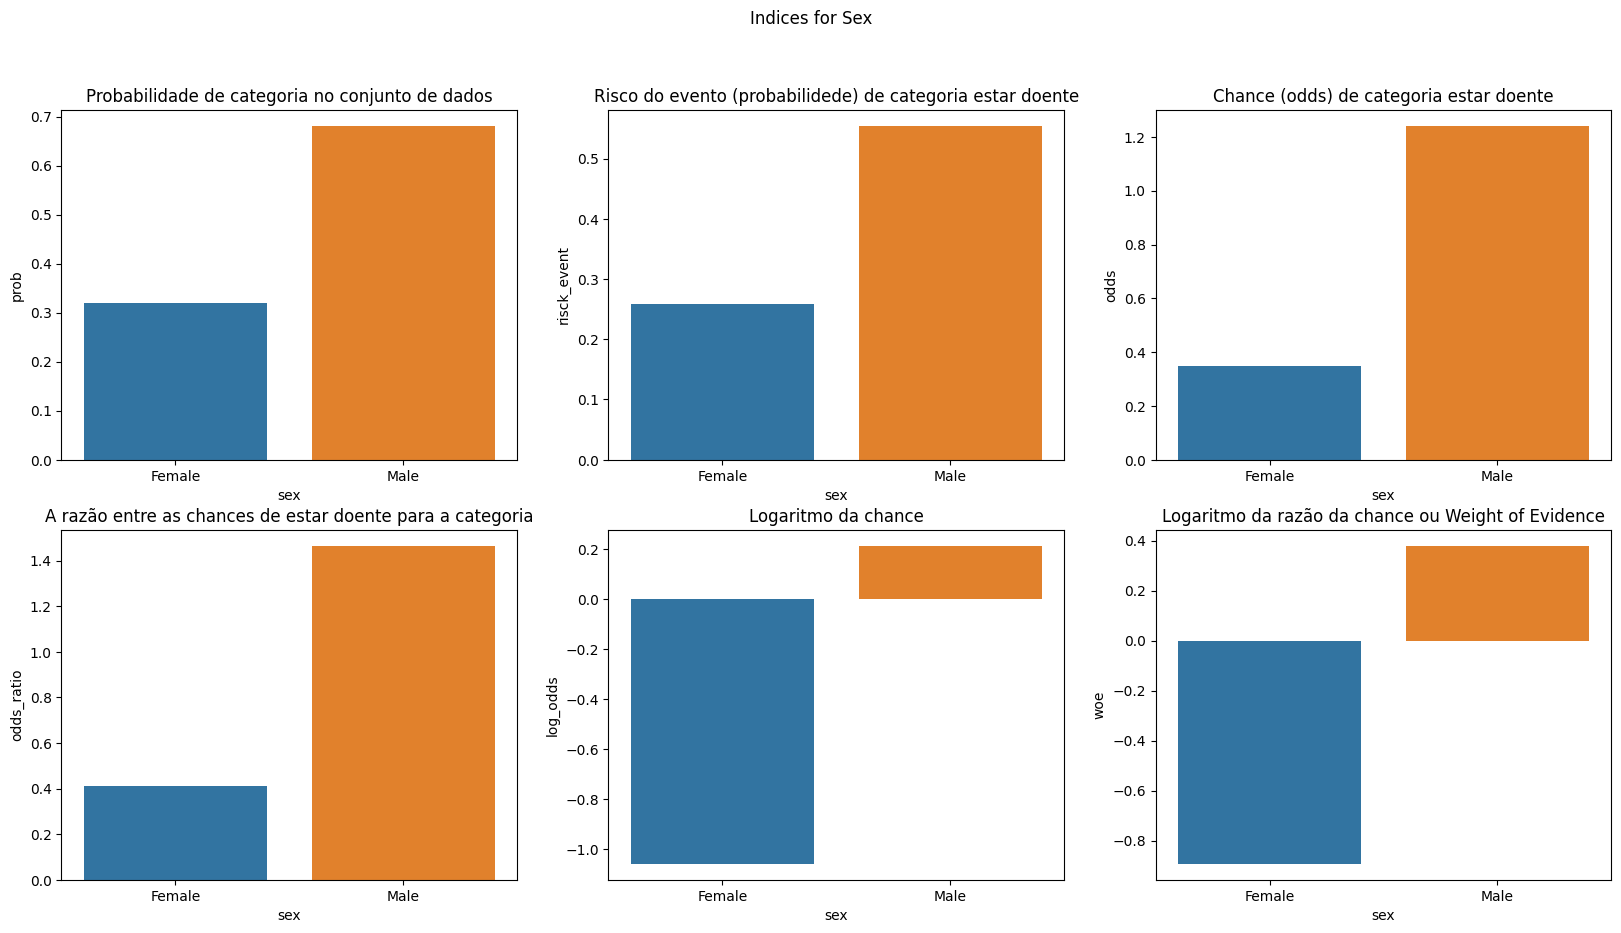

In [36]:
# Plotando gráficos de sexo
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plt.suptitle("Indices for Sex")
x = "sex"
c = 0
grafico(lax=0, rax=0, column=c, x=x, df=sex_copy)
c += 1
grafico(lax=0, rax=1, column=c, x=x, df=sex_copy)
c += 1
grafico(lax=0, rax=2, column=c, x=x, df=sex_copy)
c += 1
grafico(lax=1, rax=0, column=c, x=x, df=sex_copy)
c += 1
grafico(lax=1, rax=1, column=c, x=x, df=sex_copy)
c += 1
grafico(lax=1, rax=2, column=c, x=x, df=sex_copy)
plt.show()

In [37]:
# Inserindo coluna com os index
age_copy = age.iloc[:-1, :].copy()
age_copy['age_cat'] = age_copy.index.values
age_copy

flag_doente,0,1,All,prob,risck_event,odds,odds_ratio,log_odds,woe,age_cat
age_cat,,,,,,,,,,
"(0.0, 29.0]",1,0,1,0.003300,0.000000,0.000000,0.000000,NaN,NaN,"(0.0, 29.0]"
"(29.0, 48.0]",57,24,81,0.267327,0.296296,0.421053,0.665535,-0.864997,-0.407164,"(29.0, 48.0]"
"(48.0, 56.0]",49,31,80,0.264026,0.387500,0.632653,1.000000,-0.457833,0.000000,"(48.0, 56.0]"
"(56.0, 61.0]",23,47,70,0.231023,0.671429,2.043478,3.230014,0.714653,1.172486,"(56.0, 61.0]"
"(61.0, 77.0]",34,37,71,0.234323,0.521127,1.088235,1.720114,0.084557,0.542390,"(61.0, 77.0]"


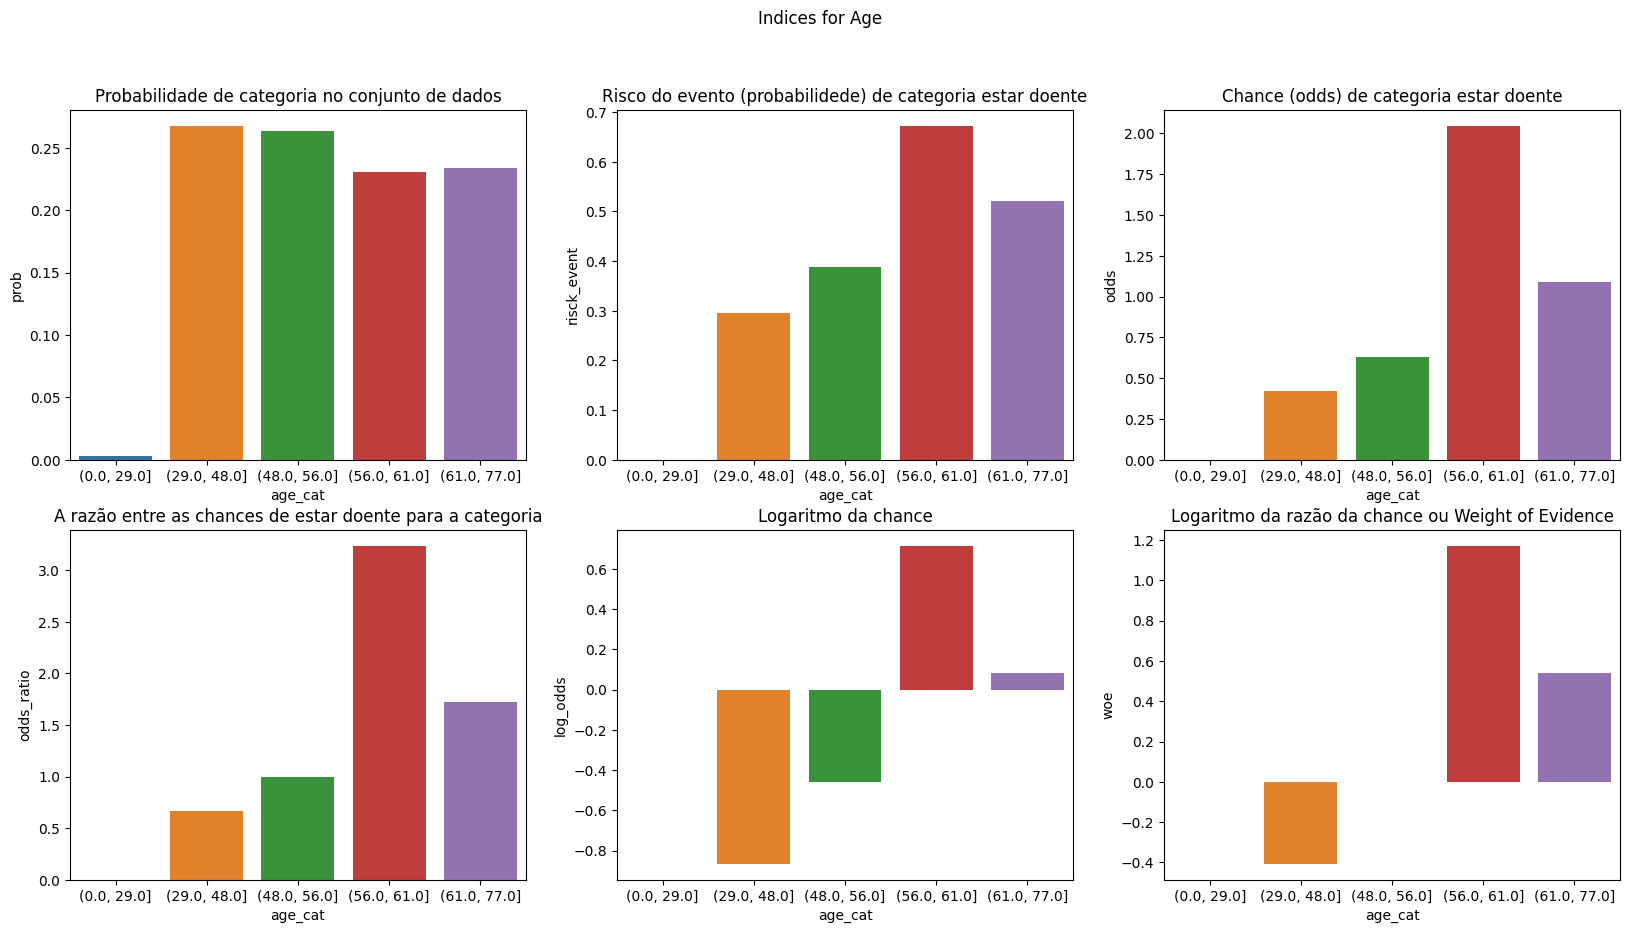

In [38]:
# Plotando gráficos de idade
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plt.suptitle("Indices for Age")
x = "age_cat"
c = 0
grafico(lax=0, rax=0, column=c, x=x, df=age_copy)
c += 1
grafico(lax=0, rax=1, column=c, x=x, df=age_copy)
c += 1
grafico(lax=0, rax=2, column=c, x=x, df=age_copy)
c += 1
grafico(lax=1, rax=0, column=c, x=x, df=age_copy)
c += 1
grafico(lax=1, rax=1, column=c, x=x, df=age_copy)
c += 1
grafico(lax=1, rax=2, column=c, x=x, df=age_copy)
plt.show()

In [39]:
# Média das idades por doença
df.groupby("flag_doente")['age'].mean()

flag_doente
0    52.585366
1    56.625899
Name: age, dtype: float64

## Outras observações

In [40]:
# Modificando a flag
df["flag_doente_cat"] = ["Saudável" if f == 0 else "Doente" for f in df["flag_doente"]]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_cat,flag_doente_cat
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(61.0, 77.0]",Saudável
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(61.0, 77.0]",Doente
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(61.0, 77.0]",Doente
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(29.0, 48.0]",Saudável
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(29.0, 48.0]",Saudável


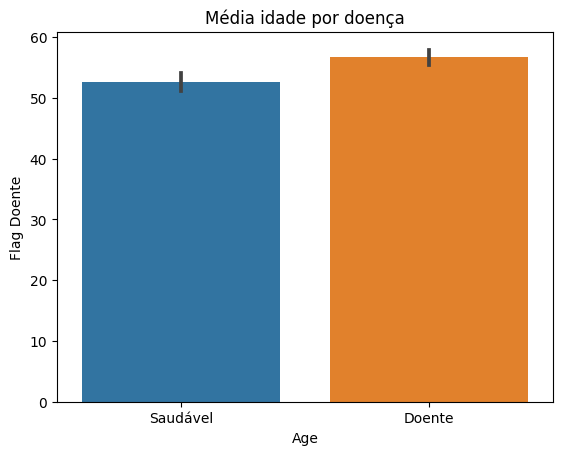

In [41]:
# Plotando médias de idade por doença
plt.title("Média idade por doença")
g = sns.barplot(
    y="age",
    x="flag_doente_cat",
    data=df,
)
g.set(
    xlabel="Age",
    ylabel="Flag Doente",
)
plt.show()

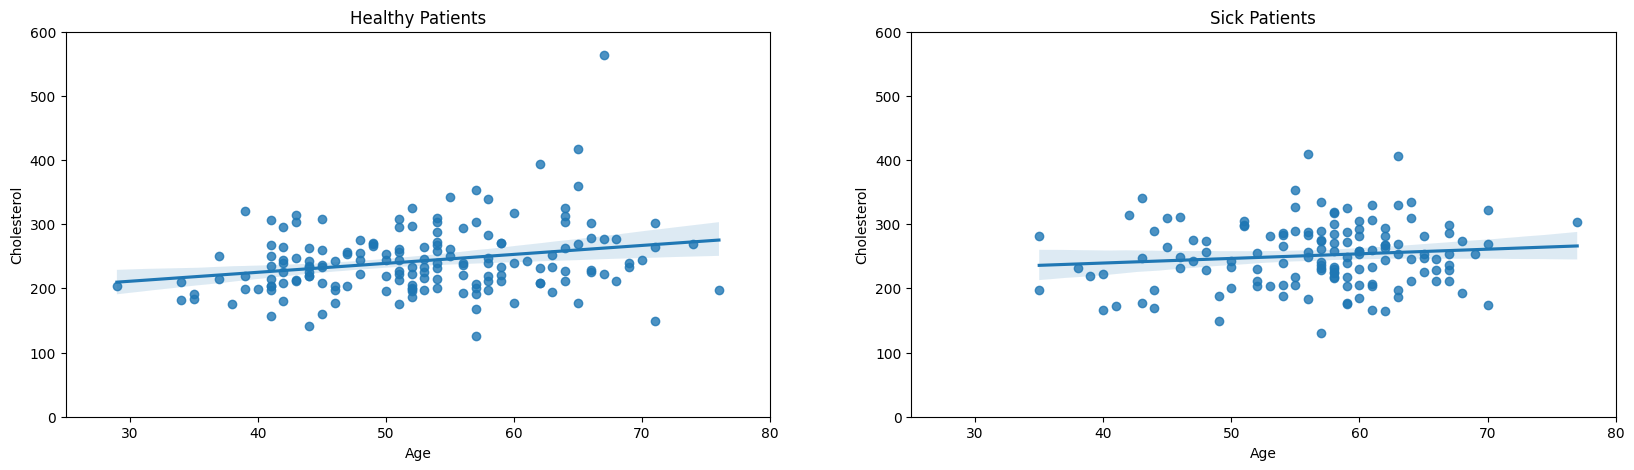

In [42]:
# Plotando relação de colesterol com idade para doença/saúde
y = "chol"

xlim = (25, 80)
ylim = (0, 600)

fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.regplot(
    x="age",
    y=y,
    data=df[df["flag_doente"] == 0],
    ax=ax[0]
)
g1.set(
    title="Healthy Patients",
    xlabel="Age",
    ylabel="Cholesterol",
    xlim=xlim,
    ylim=ylim,
)
g2 = sns.regplot(
    x="age",
    y=y,
    data=df[df["flag_doente"] == 1],
    ax=ax[1]
)
g2.set(
    title="Sick Patients",
    xlabel="Age",
    ylabel="Cholesterol",
    xlim=xlim,
    ylim=ylim,
)
plt.show()